In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
rosette_df = pd.read_csv('../data/rosetteArea.csv')
for col in rosette_df.columns:
    print(col)

Date
Plant
Rosette area (cm2)
Scale reference
pixels/cm
min. luminosity
max. luminosity
min. green-red
max. green-red
min. blue-yellow
max. blue-yello
min. size (cm2)
Include holes?
End date of stratification
Days after stratification


In [31]:
mutant = '1.10.18'
data = rosette_df[(rosette_df['Plant']=='wt') | (rosette_df['Plant']==mutant)]

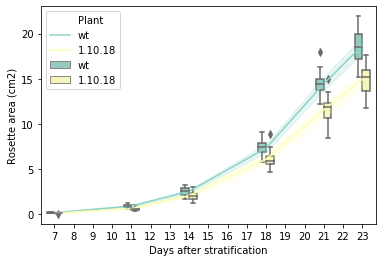

In [34]:
ax = sns.boxplot(x='Days after stratification', y='Rosette area (cm2)', data=data, hue=data['Plant'],
                 hue_order = ['wt', mutant], palette="Set3", order=np.arange(7,24))
ax = sns.lineplot(x=rosette_df['Days after stratification']-7, y='Rosette area (cm2)', data=data, hue=data['Plant'], palette="Set3", ax=ax)
